# baseline models + validation

In [25]:
#Load in the data to make the predictions
import pandas as pd

df = pd.read_csv("../data/processed/cleaned_with_features.csv")


In [26]:
X = df[["char_count", "has_tsla", "has_emoji", "exclam_count", "is_reply"]]
y = df["label"]


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.41      0.45       433
           1       0.45      0.54      0.49       378

    accuracy                           0.47       811
   macro avg       0.48      0.48      0.47       811
weighted avg       0.48      0.47      0.47       811



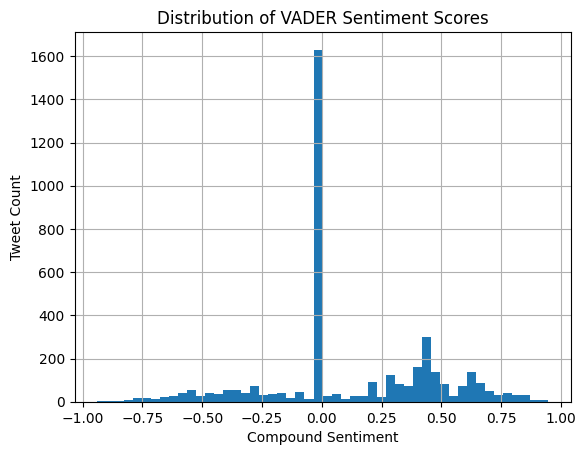

In [30]:
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/vader_features.csv")

# Histogram of sentiment scores
df["vader_sentiment"].hist(bins=50)
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("Compound Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [31]:
X = df[[
    "char_count",
    "has_tsla",
    "has_emoji",
    "exclam_count",
    "is_reply",
    "vader_sentiment"  # 👈 new one
]]

y = df["label"]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.45      0.47       433
           1       0.43      0.47      0.45       378

    accuracy                           0.46       811
   macro avg       0.46      0.46      0.46       811
weighted avg       0.46      0.46      0.46       811

